# Overview of seaborn plotting functions
- 그래프를 그리는 함수(plotting functions)에 대해 다룰 것

## Similar functions for similar tasks
- seaborn 네임스페이스는 flat함.
- 모든 기능은 최상위 수준에서 액세스할 수 있음
- 그러나 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 함수 모듈로 계층 구조로 구성되어 있음
- 예를 들어 distributions 모듈은 데이터의 분포를 나타내는 데 특화된 함수임
- 여기에는 히스토그램과 같은 친숙한 방법이 포함됨

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

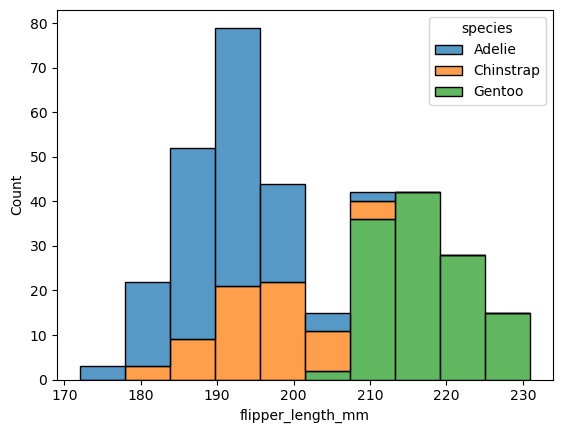

In [3]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

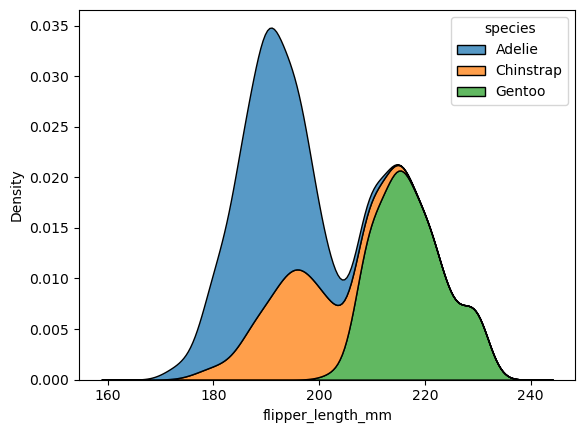

In [4]:
# 위와 똑같은 내용으로 커널 밀도 추정을 해보면...

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

- 모듈 내의 함수는 많은 기본 코드를 공유하고 라이브러리의 다른 구성 요소에 없을 수 있는 유사한 기능(예: 위 예제의 multiple="stack")을 제공함
- 다양한 표현에는 보완적인 강점과 약점이 있는 경우가 많음
- 따라서 데이터 세트를 탐색할 때 다양한 시각적 표현 간 전환을 사용할 것

# Figure-level vs. axes-level functions
- 축 수준(axes-level)
- 위의 예시
- 함수의 반환 값인 단일 matplotlib.pyplot.Axes 객체에 데이터를 표현함

- Figure 수준(figure-level)
- figure을 관리하는 Seaborn 개체(일반적으로 FacetGrid)를 통해 matplotlib와 상호작용
- 각 모듈에는 단일 figure 수준 기능이 있고, 이것은 다양한 축 수준 기능에 대한 단일 인터페이스를 제공함

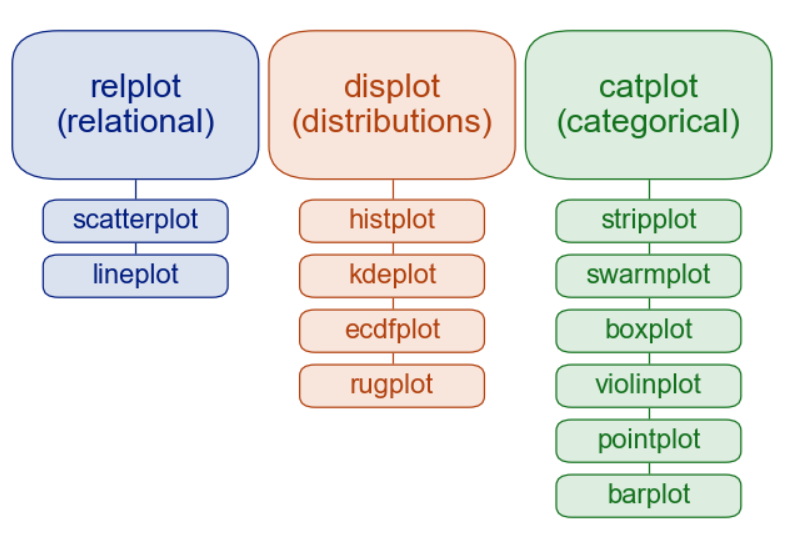

- Seaborn의 시각화 함수는 그래프 수준(figure-level)의 함수와 축 수준(axes-level)의 함수로 나뉩니다. 그래프 수준의 함수는 상위 함수로 그래프의 종류를 지정하는 파라미터를 사용해 데이터를 시각화합니다. 반면 축 수준 함수는 각 그래프의 종류에 특화된 함수입니다. 축 수준 함수는 1가지 그래프를 그리는 데 맞춤화되어 있습니다. (출처 : https://www.snugarchive.com/blog/python-data-visualization-seaborn-basic/)


- 예시
- displot : "figure-level function" for "the distributions module".

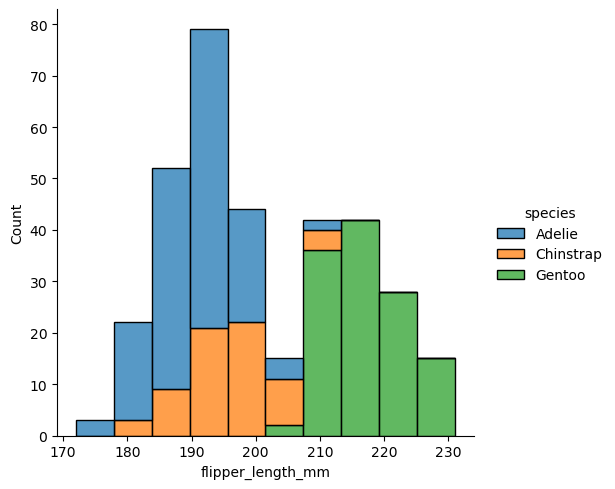

In [5]:
# histogram
# histplot()과 똑같음

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

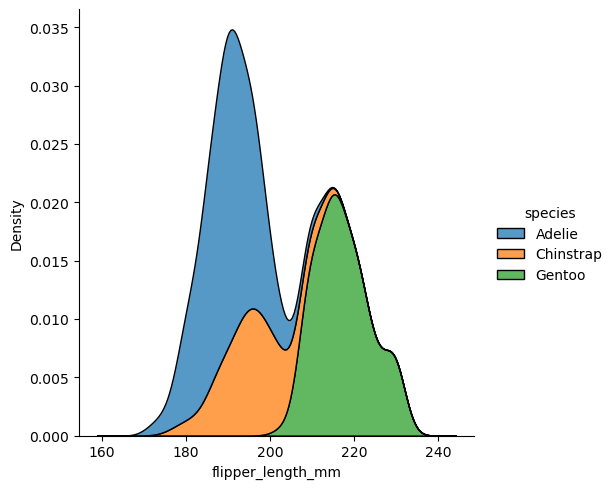

In [6]:
# kdeplot()과 똑같음

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

- Figure 수준의 플롯이 대부분 축 수준의 플롯과 비슷해 보이지만 몇 가지 차이점있음
- 특히 범례는 플롯 외부에 있고 모양도 약간 다름

- Figure 수준 함수가 제공하는 가장 유용한 기능은 여러 서브플롯이 있는 Figure를 쉽게 생성할 수 있는 것
- 예를 들어, 동일한 축에 펭귄의 각 종에 대한 세 가지 분포를 쌓는 대신 그림의 열에 각 분포를 플로팅하여 "패싯"할 수 있음

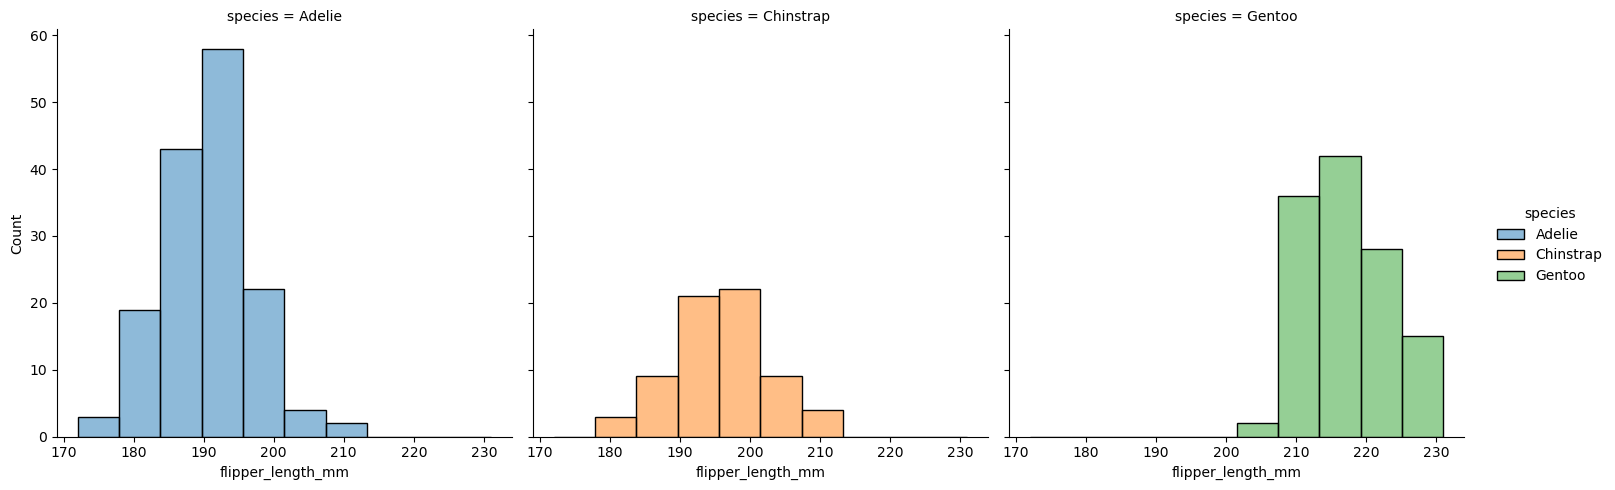

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

## Axes-level functions make self-contained plots

- 축 수준 함수는 내부적으로 `matplotlib.pyplot.gca()`를 호출하여 matplotlib 상태 머신 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그림
- 그러나 객체 지향 인터페이스와 통합되고 각 플롯이 가야 할 위치를 정확하게 지정할 수 있는 `ax=` 인수를 추가로 허용합니다.

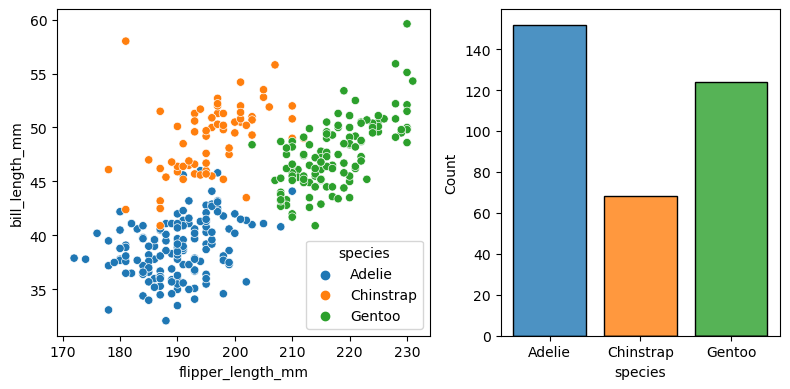

In [8]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## Figure-level functions own their figure

- 반대로 그림 수준 함수는 다른 플롯과 (쉽게) 구성될 수 없음
- 설계상 초기화를 포함하여 자체 그림을 "소유"하므로 그림 수준 함수를 사용하여 기존 축에 플롯을 그리는 개념이 없음
- 이 제약 조건을 통해 그림 수준 함수는 범례를 플롯 외부에 배치하는 것과 같은 기능을 구현할 수 있음

- 그럼에도 불구하고 반환하는 객체의 matplotlib 축에 액세스하고 플롯에 다른 요소를 추가하여 그림 수준 함수가 제공하는 것 이상을 수행할 수 있음

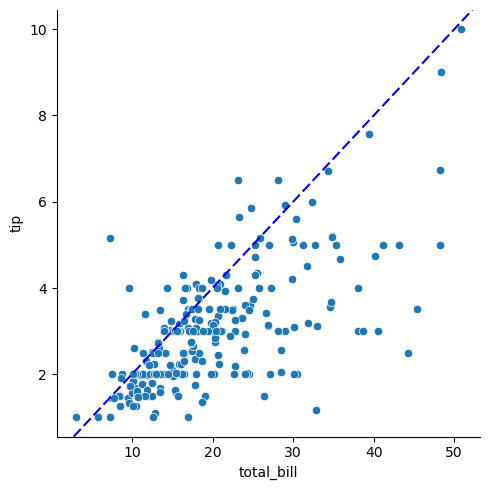

In [9]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

## Customizing plots from a figure-level function
- 그림 수준 함수는 FacetGrid 인스턴스를 반환함
- 여기에는 서브플롯 구성에 대해 "스마트"한 방식으로 플롯의 속성을 커스터마이징하는 몇 가지 방법이 있음
- 예를 들어 한 줄의 코드를 사용하여 외부 축의 레이블을 변경할 수 있음

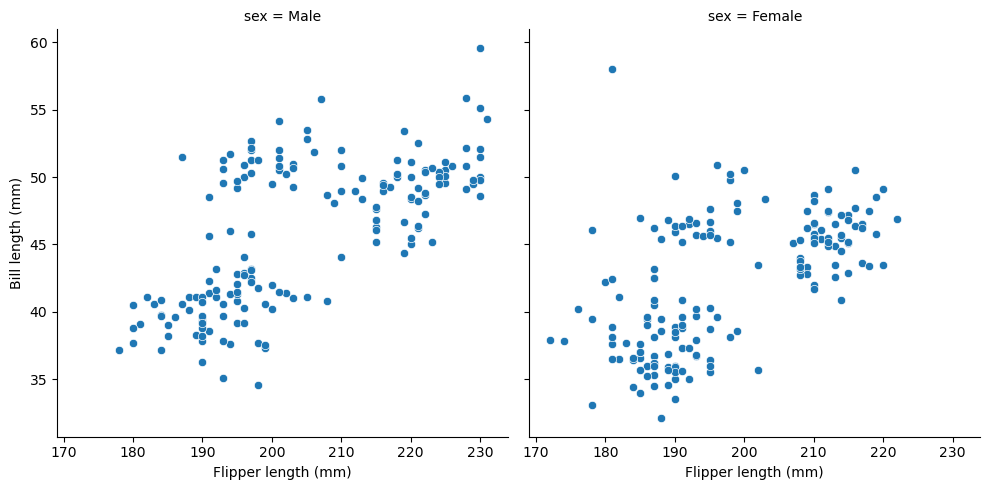

In [14]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

- 편리하긴 하지만 이 방법은 matplotlib API의 일부가 아니며 그림 수준 함수를 사용할 때만 존재한다는 점을 기억해야 함

## Specifying figure sizes

## Relative merits of figure-level functions

# Combining multiple views on the data